<a href="https://colab.research.google.com/github/flavio-mota/fundamentos-pln/blob/master/CIC260_Introdu%C3%A7%C3%A3o_ao_Processamento_de_Linguagem_Natural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução ao Processamento de Linguagem Natural (PLN)

## Objetivos gerais:


*   Apresentar noções básicas de sobre o que é o PLN
*   Criar funções simples que realizem a limpeza e análise de textos
*   Realizar algumas análises quantitativas
*   Aplicar etiquetagem morfossintáticas às palavras do corpus
*   Geração de gráficos



## Começando com uma análise simples de textos

Vamos criar uma variável chamada `sentenca` e armazenar uma pequena frase nela:

In [1]:
sentenca = 'A raposa rápida salta sobre o cão preguiçoso'

Vamos verificar agora a ocorrência de uma palavra dentro da sentença:

In [2]:
'rápida' in sentenca

True

O código acima retorna `True`, indicando que a palavra 'rápida' existe dentro da sentença. Se fosse utilizada a palavra 'gato', o retorno seria `False`, uma vez que essa palavra não existe na frase.

Agora, vamos retornar uma determinada palavra da frase através de sua posição. No exemplo a seguir, o código retorna a palavra na 5ª posição da sentença:

In [3]:
sentenca.split()[4]

'sobre'

Para exibir uma determinada palavra de trás para frente, podemos utilizar:

In [4]:
sentenca.split()[1][::-1]

'asopar'

Para exibir toda a sentença invertida:

In [5]:
sentenca[::-1]

'osoçiugerp oãc o erbos atlas adipár asopar A'

Vamos concatenar a primeira e a última palavra da sentença:

In [6]:
palavras = sentenca.split() #Vamos criar uma variável para armazenar as palavras
primeira_palavra = palavras[0] #Recuperamos a primeira palavra (posição 0)
ultima_palavra = palavras[len(palavras)-1] #Recuperamos a última palavra (tamanho do vetor de palavras menos 1)
concatenar_palavras = primeira_palavra + ultima_palavra
print(concatenar_palavras)

Apreguiçoso


Para encontrar as palavras que estão em posições pares da sentença, podemos utilizar:

In [7]:
[palavras[i] for i in range(len(palavras)) if i%2 == 0]

['A', 'rápida', 'sobre', 'cão']

## Um breve parênteses: A biblioteca NLTK

A NLTK (**N**atural **L**anguage **T**ool**K**it) é uma biblioteca do python que oferece uma infinidade de recursos para o tratamento de dados textuais. Ela conta com uma excelente documentação, que inclui passo a passo a utilização dos recursos. Um diferencial dessa biblioteca é a disponibilidade de recursos linguísticos em português. Vamos utilizar alguns desses recursos a seguir.

Link para documentação: [NLTK](https://www.nltk.org/)

## Tarefas do PLN

Ao trabalhar com textos no PLN, diversas tarefas podem ser executadas, como a *tokenização*, limpeza do texto, etiquetagem, contagens de palavras, *stemming*, etc. Vermos algumas dessas tarefas a seguir.

### Tokenização

A *tokenização* é o processo de dividir as sentenças em palavras. Considere a frase:
> "Eu estou lendo um livro."

A tarefa de *tokenização* tem como objetivo extrair as palavras (ou tokens) dessa sentença, produzindo:
> 'Eu', 'estou', 'lendo', 'um', 'livro', ' . '

Esse tipo de extração é chamada de 'unigrama', uma vez que separa uma palavra por vez. Entretanto, é possível realizar a extraçã de dois ou três *tokens* por vez. Se são 2 *tokens* por vez, chamamos de **bigramas**. Se são 3, **trigramas**. Dependendo da necessidade, podemos ter **n-gramas**, sendo n um número natural.

> **n-gramas** são sequências de n palavras de um texto.

No PLN trabalhamos com *tokens* por questão de conveniência, já que temos a tendência de realizar as análises palavra por palavra.



Vamos realizar a tokenização de uma sentença simples. Para isso vamos utilizar um módulo da NLTK que facilita esse processo.

In [8]:
import nltk #importando a biblioteca
nltk.download('all') # baixando todos os recursos da biblioteca (pode demorar)
from nltk import word_tokenize #importando o módulo word_tokenize

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

In [9]:
palavras = word_tokenize('Eu estou aprendendo sobre os fundamentos do PLN')

In [10]:
palavras

['Eu', 'estou', 'aprendendo', 'sobre', 'os', 'fundamentos', 'do', 'NLP']

Aplicar essa tarefa em frases simples pode não parecer muito útil. Sendo assim, vamos ver exemplos com um *corpus*.

#### O que é e para que serve um *corpus*?

*Corpus* pode ser definido como o conjunto de materiais linguísticos que serão analisados. Para os propósitos do PLN, é necessário que esses materiais estejam na forma de texto e que possam ser lidos por um programa de computador.

A NLTK disponibiliza diversos *corpora* (plural de *corpus*) em diversas línguas, incluindo o português. Nessa aula de introdução ao PLN, utilizaremos o *corpora* que contém as obras completas de Machado de Assis.

Os textos do *corpus* Machado são como arquivos TXT. A NLTK fornece informações sobre o *corpora* pelo método `readme()`

In [12]:
from nltk.corpus import machado #Importamos o módulo da NLTK
print(machado.readme())

Machado de Assis -- Obra Completa

http://machado.mec.gov.br/

Public Domain

Contents:

Romance

romance/marm01.txt: Ressurreição (1872)
romance/marm02.txt: A Mão e a Luva (1874)
romance/marm03.txt: Helena (1876)
romance/marm04.txt: Iaiá Garcia (1878)
romance/marm05.txt: Memórias Póstumas de Brás Cubas (1881)
romance/marm06.txt: Casa Velha (1885)
romance/marm07.txt: Quincas Borba (1891)
romance/marm08.txt: Dom Casmurro (1899)
romance/marm09.txt: Esaú e Jacó (1904)
romance/marm10.txt: Memorial de Aires (1908)

Poesia

poesia/maps01.txt: Crisálidas (1864)
poesia/maps02.txt: Falenas (1870)
poesia/maps03.txt: Americanas (1875)
poesia/maps04.txt: Gazeta de Holanda (1886-88)
poesia/maps05.txt: Ocidentais (1901)
poesia/maps06.txt: O Almada (1908)
poesia/maps07.txt: Dispersas (1854-1939)

Contos

contos/macn001.txt: Contos Fluminenses (1870); Miss Dollar; Luís Soares; A mulher de preto; O segredo de Augusta; Confissões de uma viúva moça; Linha reta e linha curva; Frei Sim
contos/macn002.txt: 

Para carregar um dos arquivos do *corpus*, basta utilizar o método `raw()`. Vamos carregar o romance "Dom Casmurro", que aparece com o nome 'romance/marm08.txt':

In [13]:
obra = machado.raw('romance/marm08.txt')

Podemos agora obter a *tokenização* do livro Dom Casmurro:

In [20]:
palavras = word_tokenize(obra)
palavras

['Romance',
 ',',
 'Dom',
 'Casmurro',
 ',',
 '1899',
 'Dom',
 'Casmurro',
 'Texto',
 'de',
 'referência',
 ':',
 'Obras',
 'Completas',
 'de',
 'Machado',
 'de',
 'Assis',
 ',',
 'vol',
 '.',
 'I',
 ',',
 'Nova',
 'Aguilar',
 ',',
 'Rio',
 'de',
 'Janeiro',
 ',',
 '1994',
 '.',
 'Publicado',
 'originalmente',
 'pela',
 'Editora',
 'Garnier',
 ',',
 'Rio',
 'de',
 'Janeiro',
 ',',
 '1899',
 '.',
 'CAPÍTULO',
 'PRIMEIRO',
 'DO',
 'TÍTULO',
 'Uma',
 'noite',
 'destas',
 ',',
 'vindo',
 'da',
 'cidade',
 'para',
 'o',
 'Engenho',
 'Novo',
 ',',
 'encontrei',
 'no',
 'trem',
 'da',
 'Central',
 'um',
 'rapaz',
 'aqui',
 'do',
 'bairro',
 ',',
 'que',
 'eu',
 'conheço',
 'de',
 'vista',
 'e',
 'de',
 'chapéu',
 '.',
 'Cumprimentou-me',
 ',',
 'sentou-se',
 'ao',
 'pé',
 'de',
 'mim',
 ',',
 'falou',
 'da',
 'Lua',
 'e',
 'dos',
 'ministros',
 ',',
 'e',
 'acabou',
 'recitando-me',
 'versos',
 '.',
 'A',
 'viagem',
 'era',
 'curta',
 ',',
 'e',
 'os',
 'versos',
 'pode',
 'ser',
 'que',
 'nã

Podemos contar o tamanho do texto obtido:

In [16]:
len(palavras)

78900

### Limpeza do texto

Em aplicações de PLN, são avaliadas unidades de texto como sílabas, palavras, frases, entre outras, e não os caracteres do texto. Sendo assim, geralmente são empregadas estratégias de limpeza do texto.

Vamos realizar a remoção da pontuação e a conversão de todo o texto para caracteres minúsculos. Podemos definir uma função para que isso possa ser feito sempre que necessário, sem repetição de códigos:

In [17]:
def limpar(lista):
  lixo = '.,:.;?!"`()[]{}\/|#$%^&*'
  quase_limpo = [x.strip(lixo).lower() for x in lista]
  return [x for x in quase_limpo if x.isalpha() or '-' in x]

In [18]:
corpus_sujo = ['banana', 'maçã.', 'abaca.te', ':Melancia']
print(limpar(corpus_sujo))

['banana', 'maçã', 'melancia']


Vamos comparar o copus da obra Dom Casmurro antes e depois da limpeza:

In [21]:
print("Antes da limpeza:", len(palavras))
palavras = limpar(palavras)
print("Depois da limpeza:", len(palavras))

Antes da limpeza: 78900
Depois da limpeza: 65180


Outra forma de realizar a limpeza de um *corpus* é através da remoção de **palavras vazias**. Palavras vazias são palavras que podem ser descartadas antes de uma análise pois possuem reduzida contribuição semântica ou nocional. Geralmente são preposições, artigos, conjunções, alguns pronomes e advérbios.

A NLTK traz uma lista de 203 palavras vazias para o português. Podemos importa-las usando:

In [22]:
vazias = nltk.corpus.stopwords.words('portuguese')

Vamos ver um exemplo:

In [23]:
sentenca = 'Eu estou aprendendo Python. É uma das linguagens de programação mais populares.'
palavras_da_sentenca = word_tokenize(sentenca)
print(palavras_da_sentenca)
sentenca_sem_palavras_vazias = ' '.join([palavra for palavra in palavras_da_sentenca if palavra not in vazias])
print(sentenca_sem_palavras_vazias)

['Eu', 'estou', 'aprendendo', 'Python', '.', 'É', 'uma', 'das', 'linguagens', 'de', 'programação', 'mais', 'populares', '.']
Eu aprendendo Python . É linguagens programação populares .


O código acima realizou a remoção das palavras que são consideradas vazias, deixando a sentença estranha para a leitura, mas com mais significado para análises com PLN.

Vamos criar uma função que remova as palavras vazias e aplicá-la a obra Dom Casmurro e verificar a mudança no tamanho do *corpus*.

In [24]:
def remove_vazias(lista):
  return [palavra for palavra in lista if palavra not in vazias]

In [26]:
print("Antes da limpeza de palavras vazias:", len(palavras))
palavras_sem_vazias = remove_vazias(palavras)
print("Depois da limpeza de palavras vazias:", len(palavras_sem_vazias))

Antes da limpeza de palavras vazias: 65180
Depois da limpeza de palavras vazias: 35428


### Contagens

Outra tarefa comum no PLN é a contagem de palavras para gerar algumas estatísticas e analisar o vocabulário e a riqueza lexical.

#### Vocabulário

O vocabulário é basicamente uma lista de todas as palavras que aparecem no *corpus*. É como um dicionário, e sendo assim, não apresenta repetição de palavras. Podemos obter o vocabulário facilmente:

In [28]:
vocabulario_sem_limpeza = set(palavras)
print("Vocabulário sem a remoção de palavras vazias: ", len(vocabulario_sem_limpeza))
vocabulario = set(palavras_sem_vazias)
print("Vocabulário com a remoção de palavras vazias: ", len(vocabulario))

Vocabulário sem a remoção de palavras vazias:  9234
Vocabulário com a remoção de palavras vazias:  9066


#### Riqueza lexical

A riqueza lexical trata-se do número de palavras distintas dividido pelo número total de palavras. O intuito dessa conta é que, quanto mais palavras diferentes aparecem no *corpus*, maior a diversidade (ou riqueza) do vocabulário.

Sendo assim, podemos fazer a análise da riqueza lexical de forma muito simples:

In [34]:
riqueza = len(vocabulario) / len(palavras)
riqueza

0.13909174593433568

#### Ocorrências

É comum querermos saber quais são as palavras que possuem mais ocorrências em um texto. Podemos criar um dicionário no Python que associa a palavra a sua contagem de ocorrências.

In [29]:
from collections import defaultdict
def ocorrencias(lista_palavras):
    dicionario = defaultdict(int)
    for p in lista_palavras:
        dicionario[p] += 1
    
    return dicionario

Utilizando a função acima, podemos obter uma estrutura do Python que contém uma chave e um valor, no nosso caso uma palavra e sua contagem de ocorrências.

Podemos utilizar uma função do Python chamada `sorted()` que, com algumas alterações, pode ordenar as palavras em função da sua ocorrência. No exemplo a seguir, veremos as 10 palavras mais frequentes considerando a obra Dom Casmurro sem a remoção das palavras vazias:

In [32]:
dic = ocorrencias(palavras)
mais_frequentes = sorted(dic.items(), key=lambda tupla:tupla[1], reverse=True)[:10]
for palavra, n in mais_frequentes:
    print(palavra, '\t', n)

que 	 2683
a 	 2483
e 	 2184
de 	 1975
o 	 1667
não 	 1524
um 	 771
é 	 715
os 	 660
da 	 626


Agora, o mesmo trecho pode ser utilizado para verificarmos as 10 mais frequentes com a limpeza de palavras vazias:

In [33]:
dic = ocorrencias(palavras_sem_vazias)
mais_frequentes = sorted(dic.items(), key=lambda tupla:tupla[1], reverse=True)[:10]
for palavra, n in mais_frequentes:
    print(palavra, '\t', n)

é 	 715
capitu 	 341
mãe 	 228
dias 	 192
tudo 	 189
capítulo 	 188
casa 	 169
ser 	 167
olhos 	 163
mim 	 162


### Stemming

O processo de *stemming* está relacionado a reduzir as palavras a suas raízes morfológicas, eliminando assim algumas formas flexionadas que possuem o mesmo significado.

Essa é uma estratégia que deve ser usada somente em determinadas situações, uma vez que homônimos indesejados podem surgir, como por exemplo: "nada", advérbio, e "nadaram", forma conjulgada do verbo "nadar", seriam reduzidas na raiz "nad". Todas essas raízes seriam contadas uma única vez, afetando a descrição do *corpus*. Porém a técnica pode ser útil na identificação de termos mais raros no *corpus*, as chamadas **Hápax legômena**.

Podemos utilizar um **stemmer** para reduzir as palavras. Vamos empregar um dos módulos da NLTK.

In [38]:
stemmer = nltk.stem.RSLPStemmer()
raizes = [stemmer.stem(x) for x in set(palavras)]
raizes[:10]

['sent',
 'confid',
 'compr',
 'mir',
 'percebê-l',
 'fortaleceram-m',
 'institu',
 'for',
 'guard',
 'comparou-n']

Podemos calcular a riqueza lexical utilizando as raízes, lembrando porém que a forma tradicional é a apresentada anteriormente:

In [39]:
len(set(raizes)) / len(raizes)

0.5367121507472384

### Etiquetagem

A etiquetagem morfossintática, também conhecida com PoS Tagging, é o processo no qual as palavras de um *corpus* recebem uma etiqueta que representa a parte do discurso (part of speech) equivalente a palavra.

Para realizar a etiquetagem, podemos empregar a biblioteca spaCy e seus componentes adicionais que permitem a etiquetagem de textos em português.

In [40]:
import spacy
spacy.cli.download("pt_core_news_sm") # Download dos recursos em pt-BR
nlp = spacy.load('pt_core_news_sm') # Carregamento dos recursos em pt-BR

✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')


Vamos executar um exemplo simples:

In [41]:
doc = nlp('Será que vai funcionar essa etiquetagem?')
etiq = [(x.orth_, x.pos_) for x in doc]
print(etiq)

[('Será', 'VERB'), ('que', 'SCONJ'), ('vai', 'AUX'), ('funcionar', 'VERB'), ('essa', 'DET'), ('etiquetagem', 'NOUN'), ('?', 'PUNCT')]


Note que as etiquetas representam as funções morfológicas de cada palavra. Esses rótulos estão em inglês. Esse [post](https://stackoverflow.com/questions/40288323/what-do-spacys-part-of-speech-and-dependency-tags-mean) do stackoverflow tem uma lista que ajuda a descobrir rapidamente o significado de cada uma.

### Gráficos

Alguns gráficos podem ser gerados para auxiliar na análise dos textos. Veremos dois: um gráfico de linha com as frequências dos *tokens* e um gráfico de pizza para representar a etiquetagem.

#### Frequências

Vamos gerar um gráfico de linha para exibir as 20 palavras mais frequentes da obra Dom Casmurro. A NLTK possui um módulo que facilita a plotagem desse gráfico:


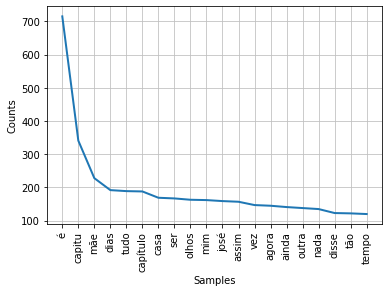

In [43]:
freq = nltk.FreqDist(palavras_sem_vazias)
freq.plot(20, cumulative=False)

#### Utilização de Partes do Discurso

Para a elaboração do gráfico de pizza com as etiquetagens, utilizaremos apenas as mais tradicionais, eliminando as de pontuação, espaços em branco, símbolos não-alfabéticos, numerais e palavras irreconhecíveis. Vamos utilizar também a biblioteca matplotlib, muito empregada no Python para a construção de gráficos. O código a seguir produz um gráfico de pizza com as porcentagens das partes do discurso na obra Dom Casmurro:

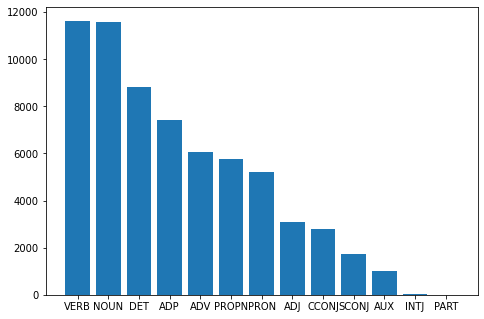

In [53]:
import matplotlib.pyplot as plt
from collections import defaultdict

lixo = ['PUNCT', 'SPACE', 'X', 'SYM', 'NUM']
doc = nlp(obra)
etiq = [(pal.orth_, pal.pos_) for pal in doc]
pos2 = [pos for (pal, pos) in etiq if pos not in lixo]
cont = defaultdict(int)
for p in pos2:
    cont[p] += 1
frequencia = sorted(cont.items(), key=lambda tupla:tupla[1], reverse=True)
cont = defaultdict(int)
for palavra, n in frequencia:
  cont[palavra] = n
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
nomes = cont.keys()
ocorrencias = cont.values()
ax.bar(nomes,ocorrencias)
plt.show()